## TASK-3
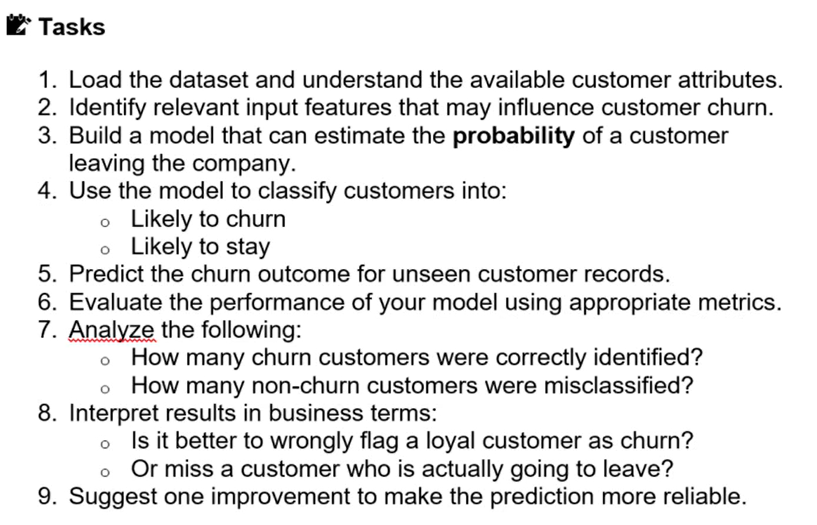

In [ ]:
#Q1
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# View data
print(df.head())

# Dataset structure
print(df.info())

# Check missing values
print(df.isnull().sum())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
#Q2
# Drop customerID (not useful)
df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Convert target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


/tmp/ipython-input-1716064727.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [ ]:
#Q3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features & target
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create & train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
#Q4
# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Classify using threshold
y_pred = (y_prob >= 0.5).astype(int)

print("Predicted Classes:\n", y_pred[:10])


Predicted Classes:
 [1 0 0 1 0 0 0 0 0 0]


In [ ]:
#Q5
print("Predicted churn outcome for unseen customers:\n", y_pred[:10])


Predicted churn outcome for unseen customers:
 [1 0 0 1 0 0 0 0 0 0]


In [ ]:
#Q6
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.8211497515968772

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409


Confusion Matrix:
 [[933 103]
 [149 224]]


In [ ]:
#Q7
TN, FP, FN, TP = cm.ravel()

print("Correctly identified churn customers (TP):", TP)
print("Non-churn customers misclassified as churn (FP):", FP)


Correctly identified churn customers (TP): 224
Non-churn customers misclassified as churn (FP): 103


In [ ]:
#Q8: Business interpretation
print("Business Interpretation:")
print("It is better to wrongly flag a loyal customer as churn")
print("than to miss a customer who is actually going to leave.")

Business Interpretation:
It is better to wrongly flag a loyal customer as churn
than to miss a customer who is actually going to leave.


In [ ]:
#Q9
print("Improvement Suggestion:")
print("Use feature scaling and advanced models like Random Forest or XGBoost.")


Improvement Suggestion:
Use feature scaling and advanced models like Random Forest or XGBoost.
